<h1 style="color:#DE006F">IMPORTING LIBRARIES</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('wine_data.csv')

In [4]:
df.head(2)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [5]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [7]:
df.head(2)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78


<Axes: xlabel='Alcohol', ylabel='Density'>

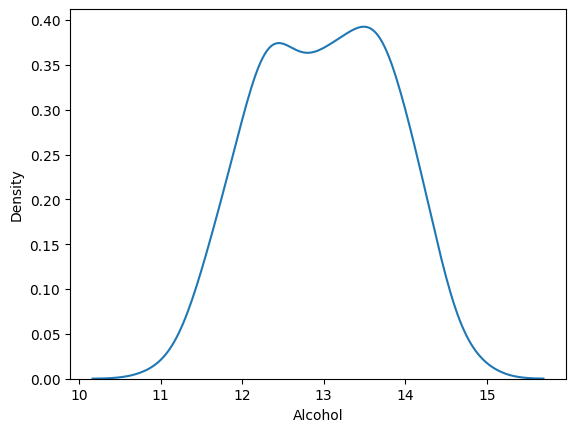

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

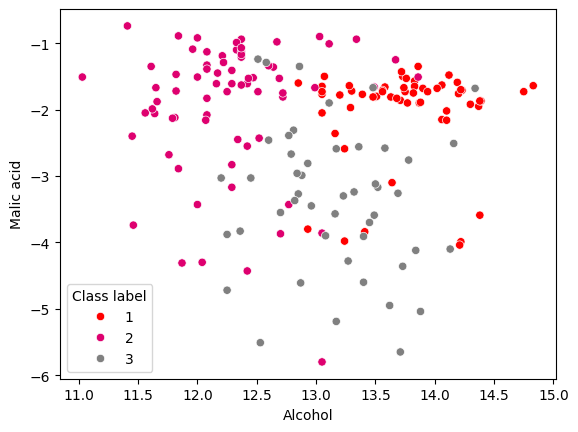

In [13]:
color_dict={1:'red',2:'#DE006F',3:"gray"}
sns.scatterplot(x=df['Alcohol'],y=-df['Malic acid'],hue=df['Class label'],palette=color_dict)

<h1 style="color:#DE006F">TRAIN, TEST AND SPLIT</h1>

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split( df.drop('Class label',axis=1),
                                                df['Class label'],
                                                test_size=0.3,
                                                random_state=0
)
X_train.shape, X_test.shape

((124, 2), (54, 2))

<h1 style="color:#DE006F">MIN MAX-SCALING</h1>

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
#X_train_scaled

In [20]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [21]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


<h1 style="color:#DE006F">CHECKING THE MIN AND MAX BEFORE SCALING</h1>

In [22]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


<h1 style="color:#DE006F">CHECKING THE MIN AND MAX AFTER SCALING</h1>

In [24]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<h1 style="color:#DE006F">EFFECT OF SCALING</h1>

<h2>PLOT-SCATTERPLOT</h2>

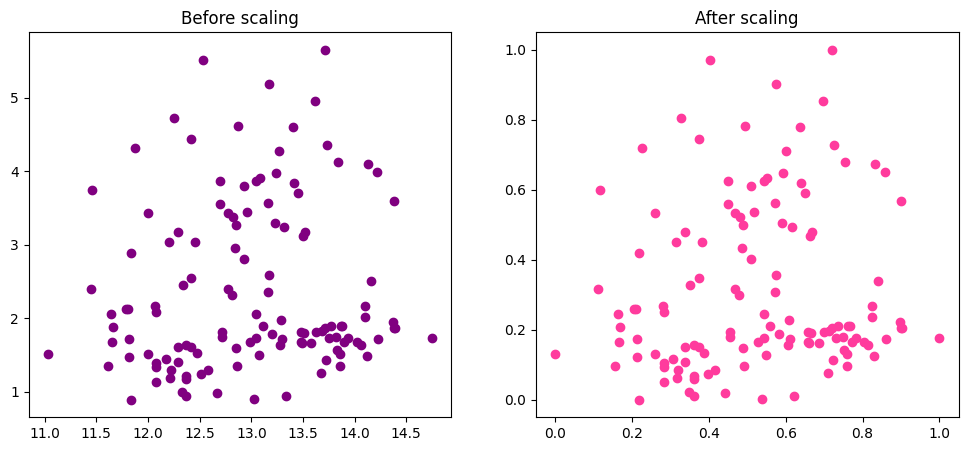

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],color='purple')
ax1.set_title('Before scaling')

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],color='#FF3B9D')
ax2.set_title('After scaling')

plt.show()

 <h2>PLOT-Kernel Density Estimation (KDE) curves</h2>

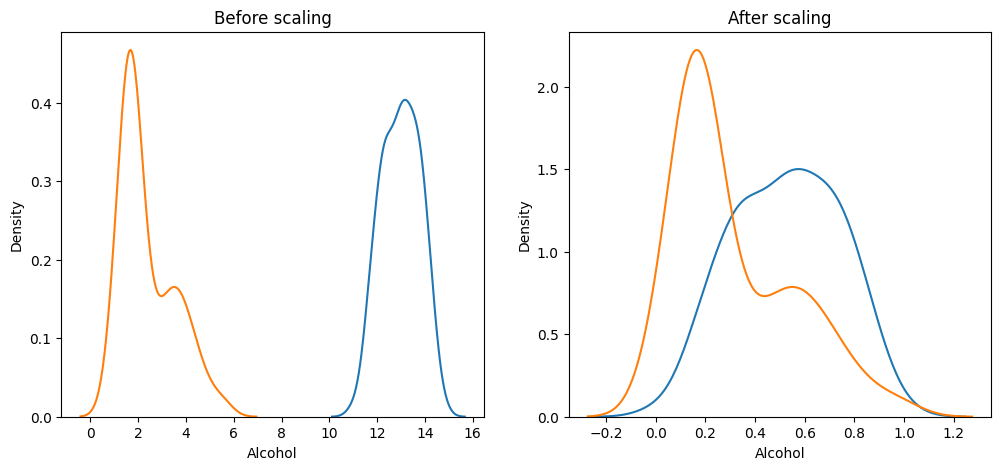

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)

plt.show()
#both the features are in the same range after scaling